# antBot Highway World Dataset Creation
Including image extraction, converting colour space, downsampling, saving as `PyTorch Tensor`.

In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as P
import seaborn as sns
import cv2
from pyRC.analyse.perfectMemory import *

# Plotting settings
sns.set_context("notebook", font_scale = 1.5)
sns.set_style("dark")
sns.set_palette("deep", 12)
from ipywidgets import interact, interactive, fixed, interact_manual
cmap='Greys_r'

In [2]:
# (h,w) pairs;
HW = [[75,360], [50,180], [25,90]]

In [3]:
# Image Operations
Images = np.load('../data/2000-10.npy')
print(Images.shape)

(200, 720, 150, 3)


## Inspect Images Captured in the World

In [4]:
# %matplotlib widget
@interact(i=(0,len(Images)-1))
def plot(i=0):
    P.figure(figsize=(16,9))
    P.imshow(np.moveaxis(Images[i],0,1))
    P.title(f'Place {i}')

interactive(children=(IntSlider(value=0, description='i', max=199), Output()), _dom_classes=('widget-interact'…

### Example Image

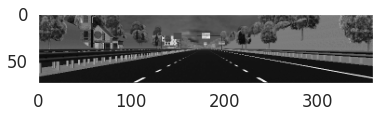

In [5]:
img = IMAGEOP((Images[0]),*HW[0])
P.imshow(img.T,cmap=cmap)

### IDF and CORCOEF as Heatmap for the Whole Dataset

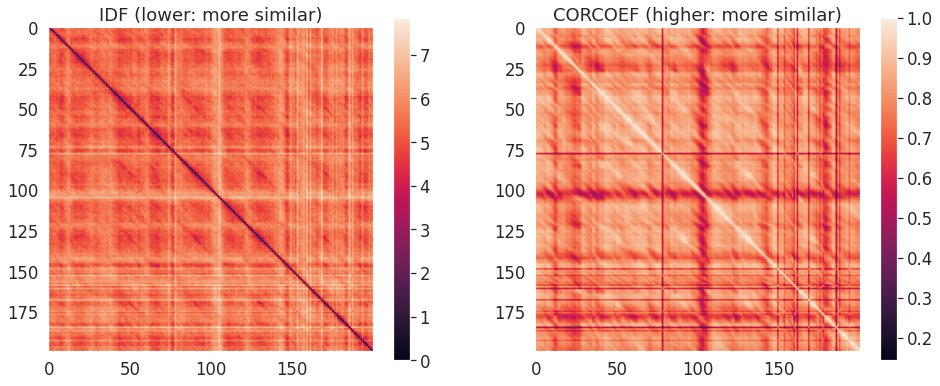

In [6]:
imgIDF = getAllIDF(Images, h=10, w=36)
imgCORCOEF = getAllCORCOEF(Images, h=10, w=36)

fig, ax = P.subplots(1,2,figsize=(16,9))
p1=ax[0].imshow(imgIDF);
ax[0].set_title('IDF (lower: more similar)')
fig.colorbar(p1, ax=ax[0], shrink=0.7)
p2=ax[1].imshow(imgCORCOEF);
ax[1].set_title('CORCOEF (higher: more similar)')
fig.colorbar(p2, ax=ax[1], shrink=0.7);
# P.savefig('./figs/IDF-CORCOEF.png')

# Experiment 1: Find Label
Given image `img`, find in set of images `Images`.

In [7]:
ID  = 19
for ID in range(len(Images)):
    img = Images[ID]
    print(ID,findIDF(Images, img, *HW[0]), findCORCOEF(Images, img, *HW[0]))

0 0 0
1 1 1
2 2 2
3 3 3
4 4 4
5 5 5
6 6 6
7 7 7
8 8 8
9 9 9
10 10 10
11 11 11
12 12 12
13 13 13
14 14 14
15 15 15
16 16 16
17 17 17
18 18 18
19 19 19
20 20 20
21 21 21
22 22 22
23 23 23
24 24 24
25 25 25
26 26 26
27 27 27
28 28 28
29 29 29
30 30 30
31 31 31
32 32 32
33 33 33
34 34 34
35 35 35
36 36 36
37 37 37
38 38 38
39 39 39
40 40 40
41 41 41
42 42 42
43 43 43
44 44 44
45 45 45
46 46 46
47 47 47
48 48 48
49 49 49
50 50 50
51 51 51
52 52 52
53 53 53
54 54 54
55 55 55
56 56 56
57 57 57
58 58 58
59 59 59
60 60 60
61 61 61
62 62 62
63 63 63
64 64 64
65 65 65
66 66 66
67 67 67
68 68 68
69 69 69
70 70 70
71 71 71
72 72 72
73 73 73
74 74 74
75 75 75
76 76 76
77 77 77
78 78 78
79 79 79
80 80 80
81 81 81
82 82 82
83 83 83
84 84 84
85 85 85
86 86 86
87 87 87
88 88 88
89 89 89
90 90 90
91 91 91
92 92 92
93 93 93
94 94 94
95 95 95
96 96 96
97 97 97
98 98 98
99 99 99
100 100 100
101 101 101
102 102 102
103 103 103
104 104 104
105 105 105
106 106 106
107 107 107
108 108 108
109 109 109
110 110 11